# FASHION CLASS CLASSIFICATION

# Ajay Bhat

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data

In [3]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# Visualizing the Dataset

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype = 'float32')

# Viewing images present in the dataset

6.0

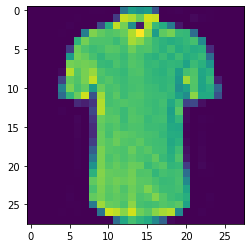

In [11]:
import random
i = random.randint(1,60000) # generating a random integer between 1 and 60,000
plt.imshow(training[i,1:].reshape(28,28))
label = training[i, 0]
label
# Remember the 10 classes decoding is as follows:
#  0 => T-shirt/top
#  1 => Trouser
#  2 => Pullover
#  3 => Dress
#  4 => Coat
#  5 => Sandal
#  6 => Shirt
#  7 => Sneaker
#  8 => Bag
#  9 => Ankle boot

# Viewing the data in a matrix format

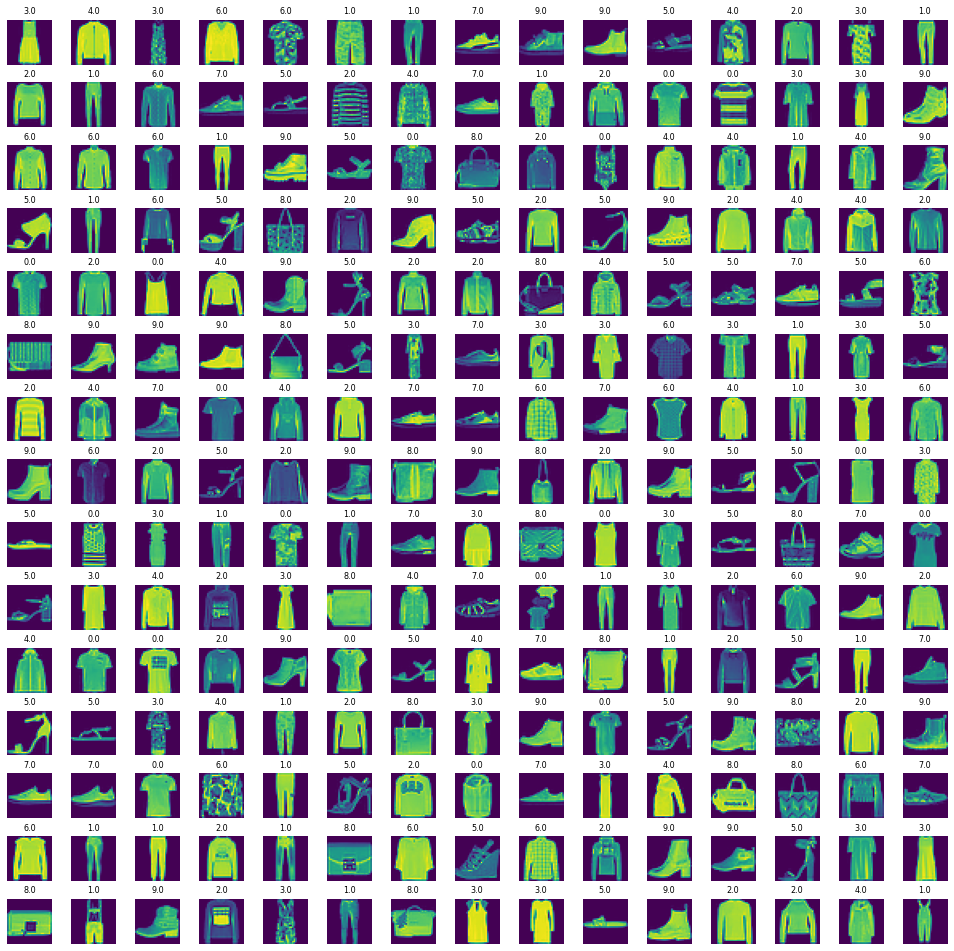

In [12]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# TRAINING THE MODEL

# Splitting the training and testing data sets

In [13]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [14]:
X_test = test[:, 1:]/255
y_test = test[:, 0]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [16]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [17]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

# Importing Neural Network Library

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [21]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(32,3, 3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\Users\Ajay Bhat\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
C:\Users\Ajay Bhat\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
C:\Users\Ajay Bhat\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ajay Bhat\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  # This is added back by InteractiveShellApp.init_path()


In [22]:
epochs = 50
cnn_model.fit(X_train,
              y_train,
              batch_size = 1024,
              nb_epoch = epochs,
              verbose = 1,
              validation_data = (X_validate, y_validate))

C:\Users\Ajay Bhat\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 130us/step - loss: 1.4374 - accuracy: 0.4445 - val_loss: 0.8252 - val_accuracy: 0.6967
Epoch 2/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.7143 - accuracy: 0.7388 - val_loss: 0.6258 - val_accuracy: 0.7716
Epoch 3/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.6018 - accuracy: 0.7785 - val_loss: 0.5644 - val_accuracy: 0.7914
Epoch 4/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.5437 - accuracy: 0.8005 - val_loss: 0.5039 - val_accuracy: 0.8152
Epoch 5/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.5046 - accuracy: 0.8164 - val_loss: 0.4818 - val_accuracy: 0.8219
Epoch 6/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.4771 - accuracy: 0.8281 - val_loss: 0.4700 - val_accuracy: 0.8264
Epoch 7/50
48000/48000 [==============================] - 3s 73us/s

KeyboardInterrupt: 

# EVALUATION OF THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(" Test Accuracy : {:.3f}".format(evaluation[1]))

In [ ]:
predicted_classes = cnn_model.predict_classes(X_test)

In [ ]:
predicted_classes

Viewing the predictions and true labels in a grid format

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


# Creating the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))